In [82]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

from scipy.fftpack import fft
from scipy import signal

## Data Preparation

In [7]:
colNames = ['timeStamp', 'ganglionTime', 'c1' ,'c2', 'c3', 'c4', 'a1', 'a2', 'a3']
data = pd.read_csv("../Data/OpenBCI-RAW-Alpha_10s.csv", sep=',', names=colNames)

In [8]:
data = data[6:]

In [9]:
data.head(5)

,timeStamp,ganglionTime,c1,c2,c3,c4,a1,a2,a3
6,0,-177.74,-187.82,-150.43,-206.58,0.0,0.0,0.0,23:56:45.889
7,1,-187.51,-188.88,-143.97,-202.39,0.0,0.0,0.0,23:56:45.898
8,2,-189.10,-198.42,-140.95,-205.70,0.0,0.0,0.0,23:56:45.898
9,3,-192.11,-196.60,-163.62,-211.47,0.0,0.0,0.0,23:56:45.913
10,4,-192.24,-195.96,-147.83,-212.96,0.0,0.0,0.0,23:56:45.913


## Time Domain Analysis

<IPython.core.display.Javascript object>


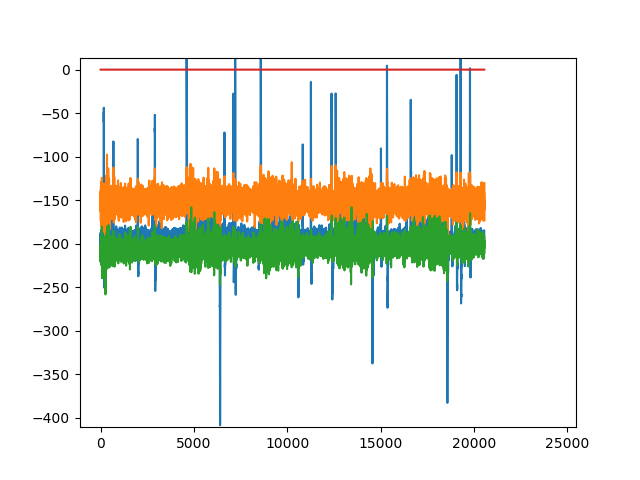

In [10]:
plt.plot(data['c1'])
plt.plot(data['c2'])
plt.plot(data['c3'])
plt.plot(data['c4'])
plt.show()

## Frequency Domain Analysis

In [78]:
# plt.plot(np.log(fft(sig[:20])))

In [79]:
data.shape

(20549, 9)

In [80]:
X = np.array(data.ix[250:, 2:6])
X.shape

(20305, 4)

Estimate power spectral density using Welch’s method.

Welch’s method computes an estimate of the power spectral density by dividing the data into overlapping segments, computing a modified periodogram for each segment and averaging the periodograms.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.welch.html

In [83]:
freq, y = signal.welch(X.T, fs=200.0) 

In [84]:
y = y.T

<IPython.core.display.Javascript object>


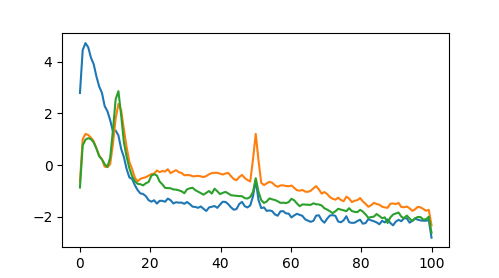

/home/krohak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [92]:
for i in range(y.shape[1]):
    _ = plt.plot(freq, np.log(y[:, i]), label='Channel {}'.format(i+1))

** Alpha waves!! ** 

## Spectrogram Analysis

In [12]:
data.shape

(20549, 9)

In [23]:
X = np.array(data.ix[250:, 2:6])
X.shape

(20305, 4)

In [51]:
sig = X[:, 0]

In [52]:
sig.shape

(20305,)

<IPython.core.display.Javascript object>


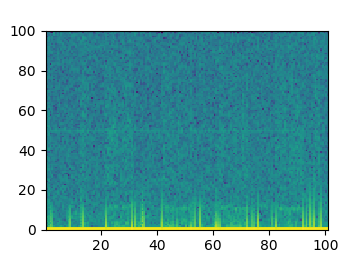

In [61]:
_ = plt.specgram(sig, NFFT=256, Fs=200.0)

** In the spectrograms above and below, you can clearly see 10 second long sections of alternating alpha waves. Area corresponding to around 10Hz is very bright in color **

<IPython.core.display.Javascript object>


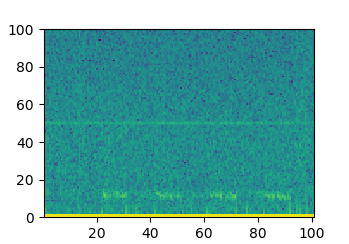

In [40]:
sig = X[:, 1]
_ = plt.specgram(sig, NFFT=256, Fs=200.0) # sampling rate is 200hz

In [63]:
# sig = X[:, 1]
# _ = plt.specgram(sig, NFFT=1024, Fs=200.0) # sampling rate is 200hz

<IPython.core.display.Javascript object>


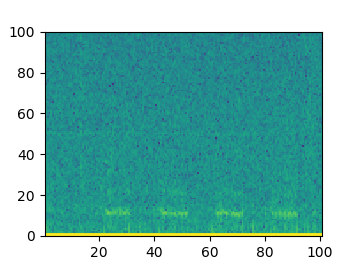

In [41]:
sig = X[:, 2]
_ = plt.specgram(sig, Fs=200.0)

<IPython.core.display.Javascript object>


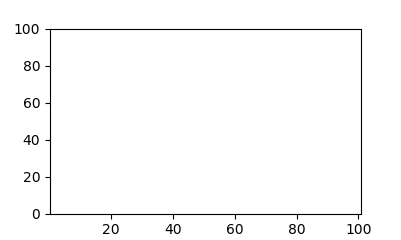

/home/krohak/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7235: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


In [45]:
sig = X[:, 3]
_ = plt.specgram(sig, Fs=200.0)